# Wines data analysis

## Questions
- What makes a good wine ?
- Where is the most expensive wine from ?
- What is the country that export the most wines ?
- Consumption pattern of wine by country
- Tips to select a good wine ?

## Libraries

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load clean data

In [101]:
wines = pd.read_csv('../data/wines_clean_dataset.csv', index_col=0)
wines

,country,description,points,price,province,title,variety,winery,vintage
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012
5,Spain,Blackberry and raspberry aromas show a typical...,87,15.0,Northern Spain,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,2011
...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,90,28.0,Mosel,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),2013
129967,US,Citation is given as much as a decade of bottl...,90,75.0,Oregon,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,2004
129968,France,Well-drained gravel soil gives this wine its c...,90,30.0,Alsace,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,2013
129969,France,"A dry style of Pinot Gris, this is crisp with ...",90,32.0,Alsace,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,2012


## Heatmap matrix

### Feature selection

In [102]:
data_matrix = wines.copy()
data_matrix = wines[["country","price","points","variety","vintage"]]
data_matrix

,country,price,points,variety,vintage
1,Portugal,15.0,87,Portuguese Red,2011
2,US,14.0,87,Pinot Gris,2013
3,US,13.0,87,Riesling,2013
4,US,65.0,87,Pinot Noir,2012
5,Spain,15.0,87,Tempranillo-Merlot,2011
...,...,...,...,...,...
129966,Germany,28.0,90,Riesling,2013
129967,US,75.0,90,Pinot Noir,2004
129968,France,30.0,90,Gewürztraminer,2013
129969,France,32.0,90,Pinot Gris,2012


In [103]:
data_matrix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111537 entries, 1 to 129970
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   country  111537 non-null  object 
 1   price    111537 non-null  float64
 2   points   111537 non-null  int64  
 3   variety  111537 non-null  object 
 4   vintage  111537 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.1+ MB


### Encoding categorical variable

#### Encoding variety (as enumerate)

In [104]:
data_matrix.variety.describe()

count         111537
unique           691
top       Pinot Noir
freq           11833
Name: variety, dtype: object

In [105]:
data_matrix.variety = pd.factorize(data_matrix.variety)[0]

/usr/local/Cellar/jupyterlab/2.1.4/libexec/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [106]:
data_matrix

,country,price,points,variety,vintage
1,Portugal,15.0,87,0,2011
2,US,14.0,87,1,2013
3,US,13.0,87,2,2013
4,US,65.0,87,3,2012
5,Spain,15.0,87,4,2011
...,...,...,...,...,...
129966,Germany,28.0,90,2,2013
129967,US,75.0,90,3,2004
129968,France,30.0,90,6,2013
129969,France,32.0,90,1,2012


In [107]:
data_matrix.variety.value_counts()

3      11833
8      10235
7       8761
12      7800
30      4958
       ...  
649        1
585        1
521        1
457        1
628        1
Name: variety, Length: 691, dtype: int64

#### Encoding country (as enumerate)

In [109]:
data_matrix["country"] = pd.factorize(data_matrix.country)[0]
data_matrix

<ipython-input-109-42402ee21831>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_matrix["country"] = pd.factorize(data_matrix.country)[0]


,country,price,points,variety,vintage
1,0,15.0,87,0,2011
2,1,14.0,87,1,2013
3,1,13.0,87,2,2013
4,1,65.0,87,3,2012
5,2,15.0,87,4,2011
...,...,...,...,...,...
129966,5,28.0,90,2,2013
129967,1,75.0,90,3,2004
129968,4,30.0,90,6,2013
129969,4,32.0,90,1,2012


In [111]:
data_matrix.country.value_counts()

1     50238
4     16286
3     15506
2      6049
0      4502
7      4129
6      3501
9      2536
8      2169
5      1951
11     1240
10     1195
12      453
14      427
17      224
33      132
13      128
15      102
24       98
18       81
23       74
20       70
16       68
22       68
25       59
29       56
28       44
26       32
30       24
31       16
38       14
40       11
19       11
34       10
27        8
32        8
36        6
21        5
35        2
37        2
39        1
41        1
Name: country, dtype: int64

In [112]:
data_matrix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111537 entries, 1 to 129970
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   country  111537 non-null  int64  
 1   price    111537 non-null  float64
 2   points   111537 non-null  int64  
 3   variety  111537 non-null  int64  
 4   vintage  111537 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 5.1 MB


In [113]:
data_matrix.corr()

,country,price,points,variety,vintage
country,1.000000,-0.047148,-0.039539,0.099570,-0.006750
price,-0.047148,1.000000,0.416561,-0.047092,0.017091
points,-0.039539,0.416561,1.000000,-0.049421,0.063750
variety,0.099570,-0.047092,-0.049421,1.000000,-0.086409
vintage,-0.006750,0.017091,0.063750,-0.086409,1.000000


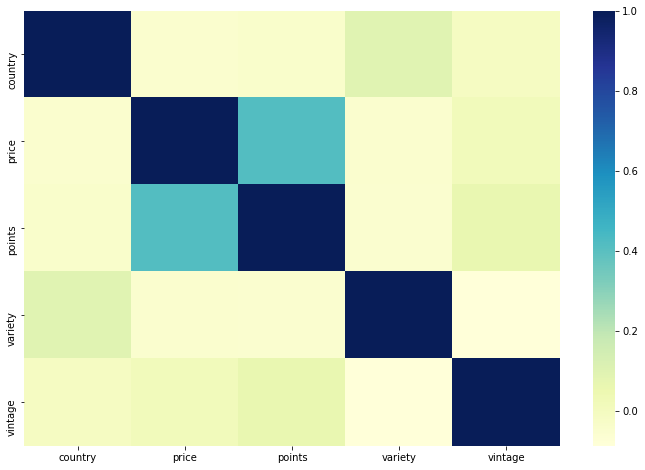

In [115]:
fig,ax = plt.subplots(figsize=(12, 8))
ax = sns.heatmap(data_matrix.corr(),cmap="YlGnBu")
plt.show()